In [ ]:
!pip install --upgrade pip==20.2
!pip install -U seaborn scikit-learn model-card-toolkit

     |████████████████████████████████| 1.5 MB 7.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.2.0 requires pip>=20.3, but you have pip 20.2 which is incompatible.
Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.2)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (1.0.1)
     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 1.7 MB 18.7 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 6.5 MB 15.0 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 127 kB 72.1 MB/s 
     |██████████

Did you restart the runtime?
If you are using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...).

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

In [ ]:
!pip install category_encoders
!pip install wandb
!pip install onnx
!pip install skl2onnx
!pip install onnxruntime
!pip install onnxmltools

     |████████████████████████████████| 82 kB 395 kB/s 
     |████████████████████████████████| 1.7 MB 8.8 MB/s 
     |████████████████████████████████| 140 kB 44.0 MB/s 
     |████████████████████████████████| 97 kB 6.9 MB/s 
     |████████████████████████████████| 180 kB 68.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=140440d0c3dd6b68f6c6241480a142e42a2a014e56d2e7918fc0468b950720a5
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=e5670b4e8666de37d967c3d20dba40397bf2e2064a2f5c34e262381014551682
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
Successfully built pathtools subprocess32


     |████████████████████████████████| 12.7 MB 8.7 MB/s 
     |████████████████████████████████| 271 kB 8.0 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 4.8 MB 8.8 MB/s 
     |████████████████████████████████| 300 kB 9.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import wandb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import onnxruntime as rt
from skl2onnx import convert_sklearn, __version__, update_registered_converter
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx.common.data_types import Int64TensorType
from skl2onnx.common.shape_calculator import calculate_linear_classifier_output_shapes
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost  # noqa
import pprint

import wandb
import os

warnings.filterwarnings("ignore")

In [ ]:
os.environ["WANDB_API_KEY"] = "9b24652fd248c5ffcab3d4a54eca3edd254b97bb"

# Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rajap20/streamlit-example/master/data_final.csv')

In [ ]:
df.head(5)

,Customer_id,Date_disb,pay_type,area_code,pin_code,state,dealer,product_code,tenure,roi,emi,proc_fee,asset_cost,loan_amt,gender,qualification,employ_type,resid_type,age,cibil_score,net_salary,net_irr,fraud
0,0,2/13/2020,ACH,3075,530041,AP,DEALER,SC,0.470588,-0.793282,0.124252,-0.093758,87000,71000,M,OTHERS,SAL,O,0.306122,-0.906781,0.158169,-1.321153,0
1,1,06-02-2020,ADM,3075,532123,AP,DEALER,SC,0.352941,-0.952045,0.083863,-0.572295,61500,51000,F,PG,SAL,O,0.551020,0.163204,1.161336,-1.308269,0
2,2,10-02-2020,ADM,3075,533218,AP,ASC,SC,0.352941,0.318061,0.210079,0.913555,87000,74038,M,SSC,SEP,O,0.530612,NaN,0.910545,0.605033,0
3,3,10-02-2020,ADM,3075,532484,AP,DEALER,SC,0.352941,-1.309262,0.166511,0.649593,84000,69720,M,OTHERS,AGR,O,0.224490,-0.167982,-0.544048,-1.098901,0
4,4,10-02-2020,ADM,3075,530046,AP,DEALER,SC,0.352941,-0.713900,0.092091,-0.572295,61500,52220,F,HSC,SAL,O,0.224490,NaN,-0.343415,-0.986164,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_id    11702 non-null  int64  
 1   Date_disb      11702 non-null  object 
 2   pay_type       11702 non-null  object 
 3   area_code      11702 non-null  int64  
 4   pin_code       11702 non-null  int64  
 5   state          11702 non-null  object 
 6   dealer         11702 non-null  object 
 7   product_code   11702 non-null  object 
 8   tenure         11702 non-null  float64
 9   roi            11702 non-null  float64
 10  emi            11702 non-null  float64
 11  proc_fee       11702 non-null  float64
 12  asset_cost     11702 non-null  int64  
 13  loan_amt       11702 non-null  int64  
 14  gender         11698 non-null  object 
 15  qualification  11698 non-null  object 
 16  employ_type    11698 non-null  object 
 17  resid_type     11698 non-null  object 
 18  age   

# Feature Set Selection




In [ ]:
df.columns

Index(['Customer_id', 'Date_disb', 'pay_type', 'area_code', 'pin_code',
       'state', 'dealer', 'product_code', 'tenure', 'roi', 'emi', 'proc_fee',
       'asset_cost', 'loan_amt', 'gender', 'qualification', 'employ_type',
       'resid_type', 'age', 'cibil_score', 'net_salary', 'net_irr', 'fraud'],
      dtype='object')

In [ ]:
x_features = ['area_code', 'state', 'resid_type', 'net_irr', 'proc_fee',
       'asset_cost', 'loan_amt', 'emi', 'net_salary', 'roi', 'tenure',
       'age']

In [ ]:
cat_features = ['area_code', 'state', 'resid_type']

In [ ]:
num_features = list(set(x_features) - set(cat_features))
num_features

['age',
 'loan_amt',
 'net_salary',
 'proc_fee',
 'net_irr',
 'asset_cost',
 'emi',
 'tenure',
 'roi']

In [ ]:
df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_code   11702 non-null  int64  
 1   state       11702 non-null  object 
 2   resid_type  11698 non-null  object 
 3   net_irr     11702 non-null  float64
 4   proc_fee    11702 non-null  float64
 5   asset_cost  11702 non-null  int64  
 6   loan_amt    11702 non-null  int64  
 7   emi         11702 non-null  float64
 8   net_salary  11702 non-null  float64
 9   roi         11702 non-null  float64
 10  tenure      11702 non-null  float64
 11  age         11698 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
df[cat_features] = df[cat_features].astype(object)
df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_code   11702 non-null  object 
 1   state       11702 non-null  object 
 2   resid_type  11698 non-null  object 
 3   net_irr     11702 non-null  float64
 4   proc_fee    11702 non-null  float64
 5   asset_cost  11702 non-null  int64  
 6   loan_amt    11702 non-null  int64  
 7   emi         11702 non-null  float64
 8   net_salary  11702 non-null  float64
 9   roi         11702 non-null  float64
 10  tenure      11702 non-null  float64
 11  age         11698 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
df = df[x_features + ['fraud']].dropna()
df.shape

(11698, 13)

In [ ]:
X = df[x_features]
y = df['fraud']

In [ ]:
"""X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)"""

'X_train, X_test, y_train, y_test = train_test_split(X,\n                                                    y,\n                                                    train_size = 0.8,\n                                                    random_state = 80)'

# Function Defining

In [ ]:
def prepare_data(X,
                 y,
#                 num_scaler = None,
#                 num_imputer = None,
#                 cat_imputer = None,
                 cat_encoder,
                 num_scaler,
                 num_features,
                 cat_features,
                 train_size = 0.8,
                 seed = 100):
  
  # Split the dataset into train and test split
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      train_size = train_size,
                                                      random_state = seed)
  
  
  # encoder the categorical features
  cat_encoder.fit(X=x_train, y=y_train)
  x_train_encoded = cat_encoder.transform(x_train)
  x_test_encoded = cat_encoder.transform(x_test)

  # scaling numeric features
  num_scaler.fit(x_train[num_features])
  x_train_scaler = num_scaler.transform(x_train[num_features])
  x_test_scaler = num_scaler.transform(x_test[num_features])

  return x_train_encoded, x_test_encoded, y_train, y_test
  

In [ ]:
def get_total_cost( actual, predicted, cost_TNs, cost_FNs ):
    # Get the confusion matrix and calculate cost
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    return tn * cost_TNs + fn * cost_FNs

def run_model_experiment(model,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         labels,
                         name,
                         config = None,
                         tags = None):
  
  
  model.fit(x_train, y_train)

  wandb.init(project='mlops', config=config, tags = tags)
  wandb.run.name = name

  test_df=pd.DataFrame({
                      "y_test":y_test,
                       "y_prob":model.predict_proba(x_test)[:,1]
                      })
  cost_df = pd.DataFrame( columns = ['prob', 'cost'])
  idx = 0
  cost_FPs = 350
  cost_TPs = -84

  ## Iterate cut-off probability values between 0.1 and 0.5
  for each_prob in range(0,100):
    cost = get_total_cost(test_df.y_test, test_df.y_prob.map(lambda x: 1 if x > (each_prob/100) else 0), cost_TPs, cost_FPs)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

  cost_df = cost_df.sort_values( 'cost', ascending = True )
  min_cost = cost_df.iloc[0,1]
  cutoff_prob = cost_df.iloc[0,0]

  test_df['y_pred'] = test_df.y_prob.map(lambda x: 1 if x > cutoff_prob else 0)

  

  clasf_matrix = confusion_matrix(test_df.y_test, test_df.y_pred)
  sensitivity = [round(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]),4)]
  specificity = [round(clasf_matrix[0,0]/(clasf_matrix[0,1]+clasf_matrix[0,0]),4)]
  precision = [round(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1]),4)]
  accuracy = [round((clasf_matrix[1,1]+clasf_matrix[0,0])/(clasf_matrix[1,1]+clasf_matrix[1,0]+clasf_matrix[0,1]+clasf_matrix[0,0]),4)]
  F_Score = [round(2*(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1]))*(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]))/((clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1])) + (clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]))), 4)]
  cost = min_cost

  wandb.log( {
      "sensitivity" : sensitivity, 
      "specificity": specificity,
      "precision" : precision,
      "accuracy" : accuracy,
      "F_Score" : F_Score,
      "cost" : cost})
  
  y_probas = test_df["y_prob"]
  
  
  """wandb.sklearn.plot_classifier(model, 
                               x_train, 
                               x_test, 
                               y_train, 
                               y_test,
                               y_probas,
                               lables,  
                               model_name=name,
                              feature_names=None)"""
  
  wandb.Artifact(name, 
                 type = 'model',
                 description = config)

  wandb.save()
  wandb.finish()

  return model

In [ ]:
from category_encoders import OneHotEncoder, TargetEncoder


ohe_encoder = OneHotEncoder(cols = cat_features,
                            use_cat_names = True)

target_encoder = TargetEncoder(cols = cat_features)


std_scaler = StandardScaler()


# Baseline Model - Decision Tree

In [ ]:

x_train, x_test, y_train, y_test = prepare_data(X,
                                                y,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

dtree_model = DecisionTreeClassifier(max_depth = 15)  

lables = [0,1]

dtree_model = run_model_experiment(dtree_model,
                                   x_train,
                                   y_train,
                                   x_test,
                                   y_test,
                                   lables,
                                   name = 'DecisionTreeWithOHE',
                                   tags = ['Decision Tree', 'baseline', 'OheEncoder'])

wandb: Currently logged in as: madhur1 (use `wandb login --relogin` to force relogin)


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


cost,▁
cost,-118160.0


# Random Forest with OHE

In [ ]:
x_train, x_test, y_train, y_test = prepare_data(X,
                                                y,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

params = { "n_estimators": 301,
           "max_depth": 20,
           "max_features": .6,
           "max_samples": 0.4 }

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(**params) 

rf_model = run_model_experiment(rf_model,
                                   x_train,
                                   y_train,
                                   x_test,
                                   y_test,
                                   lables,
                                   name = 'RandomForestWithOHE',
                                   tags = ['Random Forest', 'experiment', 'OheEncoder'])

wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


cost,▁
cost,-122388.0


# XGBoost with OHE

In [ ]:
x_train, x_test, y_train, y_test = prepare_data(X,
                                                y,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

params = { 
          "n_estimators": 301,
          "learning_rate": 0.1 ,
          "max_depth": 20,
          "min_child_weight": 7,
          "gamma": 0.1,
          "colsample_bytree" : 0.7
          }

from xgboost import XGBClassifier

xgb_model = XGBClassifier(**params) 

xgb_model = run_model_experiment(xgb_model,
                                   x_train,
                                   y_train,
                                   x_test,
                                   y_test,
                                   lables,
                                   name = 'XGBoostWithOHE',
                                   tags = ['XGBoost', 'experiment', 'OheEncoder'])

wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


cost,▁
cost,-122178.0


# Random Forest with OHE with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

def prepare_data_SMOTE(X,
                 y,
#                 num_imputer = None,
#                 cat_imputer = None,
                 cat_encoder,
                 num_scaler,
                 num_features,
                 cat_features,
                 train_size = 0.8,
                 seed = 100):
  
  # Split the dataset into train and test split
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      train_size = train_size,
                                                      random_state = seed)
  
  
  # encoder the categorical features
  cat_encoder.fit(X=x_train, y=y_train)
  x_train_encoded = cat_encoder.transform(x_train)
  x_test_encoded = cat_encoder.transform(x_test)

  oversample = SMOTE()
  x_train_sm, y_train_sm = oversample.fit_resample(x_train_encoded, y_train)

  return x_train_sm, x_test_encoded, y_train_sm, y_test


# XGBoost with OHE and SMOTE

In [ ]:
x_train, x_test, y_train, y_test = prepare_data_SMOTE(X,
                                                y,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

params = { 
          "n_estimators": 301,
          "learning_rate": 0.1 ,
          "max_depth": 20,
          "min_child_weight": 7,
          "gamma": 0.1,
          "colsample_bytree" : 0.7
          }

from xgboost import XGBClassifier

xgb_model = XGBClassifier(**params) 

xgb_model = run_model_experiment(xgb_model,
                                   x_train,
                                   y_train,
                                   x_test,
                                   y_test,
                                   lables,
                                   name = 'XGBoostWithOHEwithSMOTE',
                                   tags = ['XGBoost', 'experiment', 'OheEncoder', 'SMOTE'])

wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


cost,▁
cost,-122458.0


Plot data
We will create several plots from the data that we will include in the model card.

In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

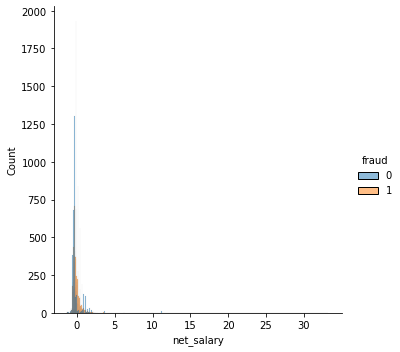

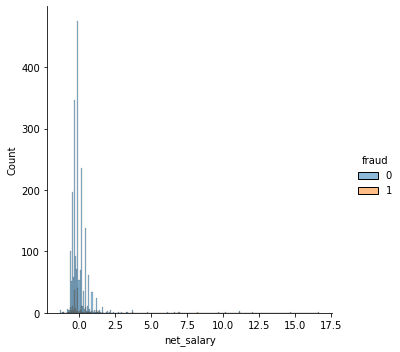

In [ ]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=x_train['net_salary'], hue=y_train)
net_salary_train = plot_to_str()

sns.displot(x=x_test['net_salary'], hue=y_test)
net_salary_test = plot_to_str()

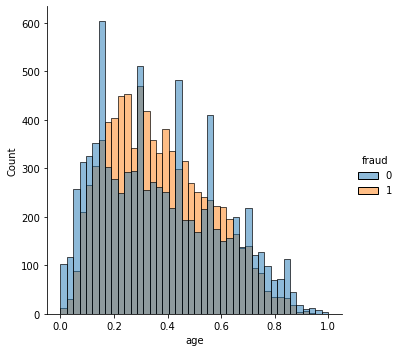

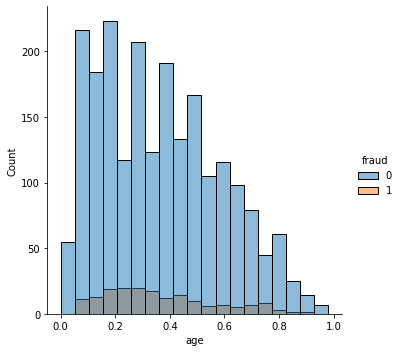

In [ ]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=x_train['age'], hue=y_train)
age_train = plot_to_str()

sns.displot(x=x_test['age'], hue=y_test)
age_test = plot_to_str()

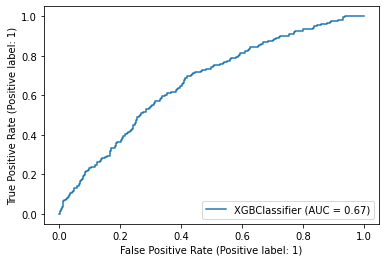

In [ ]:
plot_roc_curve(xgb_model, x_test, y_test)
roc_curve = plot_to_str()

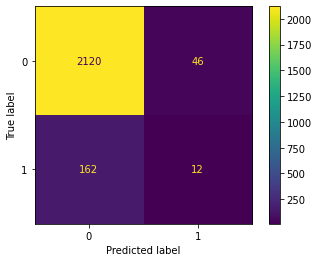

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(xgb_model, x_test, y_test)
confusion_matrix = plot_to_str()

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

In [ ]:
model_card.model_details.name = 'Vehicle Credit Assessment Model'
model_card.model_details.overview = (
    'The model is meant to be used to generate additional credit default probability score to be used along with manual credit application assessment. It is also meant to generate a ranked list to be followed by Post Asset verification agents to optimise their house visit sequences.')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Group 7', contact='group7@google.com')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

In [ ]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('The model takes private information of the user and outputs a default risk, which is also a private information. Hence, the users of the model must be made to sign an NDA. Further, there is a possibility that the credit risk output probability might add bias to the human underwriter’s own assessment, thus backfiring the intended use.')
)]
model_card.considerations.use_cases = [mctlib.UseCase(description='Credit default probability evaluation; rank order sequencing for Post Asset Verification agents')]
model_card.considerations.users = [mctlib.User(description='Credit underwriting officers'), mctlib.User(description='Post Asset Verification agents ')]

In [ ]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(x_train)} rows with {len(x_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=age_train),
    mctlib.Graphic(image=net_salary_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Test Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(x_test)} rows with {len(x_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=age_test),
    mctlib.Graphic(image=net_salary_test)
]

In [ ]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve),
    mctlib.Graphic(image=confusion_matrix)
]

In [ ]:
model_card.quantitative_analysis.performance_metrics = [
  mctlib.PerformanceMetric(type='Expected profit per customer', value= str("Rs. 559.09")),
]

In [ ]:
mct.update_model_card(model_card)

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format(output_file='/mnt/demo_cardv2.html')

In [ ]:
display.display(display.HTML(html))

Name,Value
Expected profit per customer,Rs. 559.09
